# Demo-11 Heart Disease

In [1]:
# pip install -U seaborn

In [2]:
# pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [4]:
train = pd.read_csv('heart_2020_cleaned.csv')
train.sample(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
263147,No,26.45,Yes,No,No,2.0,5.0,No,Female,30-34,Hispanic,No,Yes,Very good,5.0,No,No,No
126454,No,23.72,Yes,No,No,0.0,2.0,No,Male,40-44,White,No,Yes,Excellent,7.0,No,No,No
103311,No,24.69,No,No,No,0.0,2.0,No,Female,18-24,Black,No,Yes,Good,7.0,No,No,No


In [5]:
train.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
train.describe().style.background_gradient(cmap = "Set3")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


BMI = Body Mass Index (BMI = 20.1 kg/m2)

MentalHealth = Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

PhysicalHealth = Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

SleepTime = On average, how many hours of sleep do you get in a 24-hour period?

## Missingno

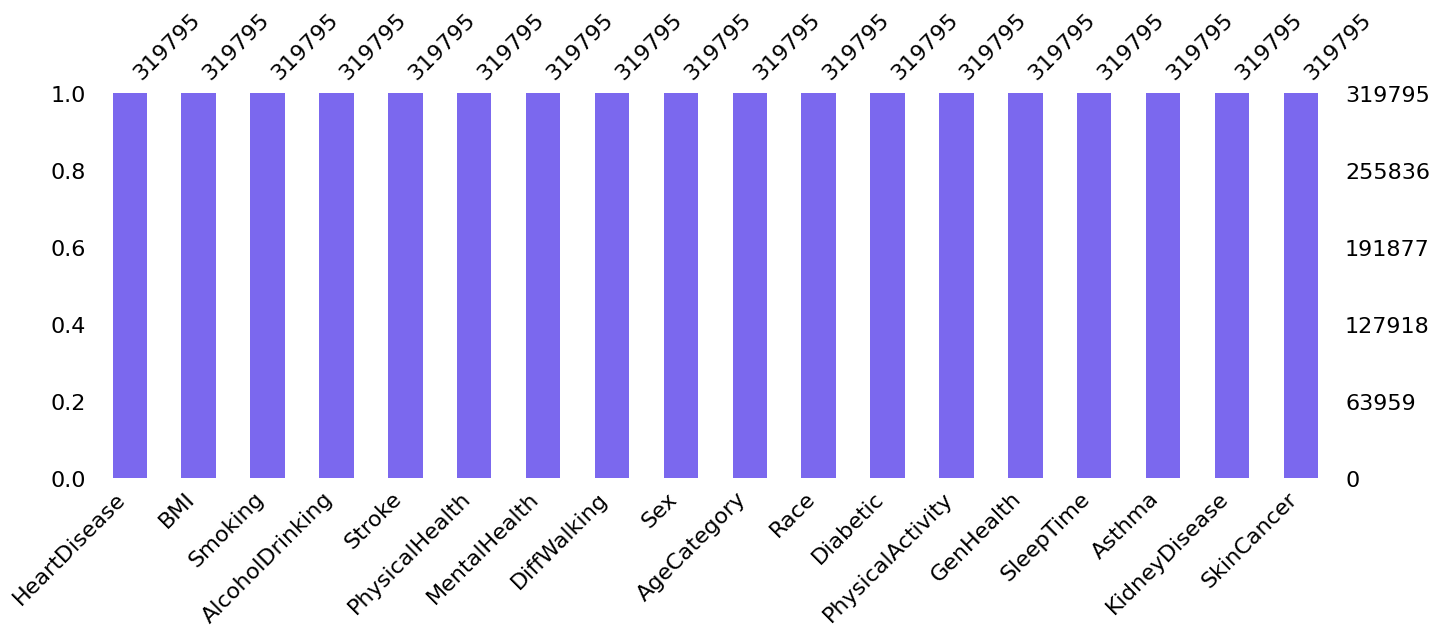

In [7]:
msno.bar(train, figsize = (16,5),color = "#7B68EE")
plt.show()

## distribution of the target variable

<Axes: xlabel='HeartDisease', ylabel='count'>

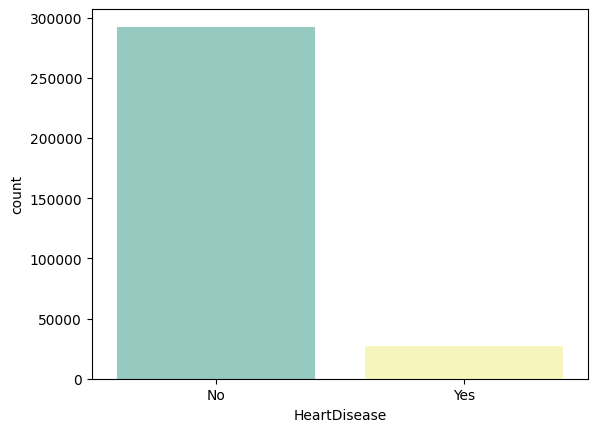

In [8]:
sns.countplot(data=train, x='HeartDisease', palette='Set3', hue='HeartDisease', legend=False)

## unique values in categorical objects

In [9]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values"\
          .format(column_name = column_name, unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


## Numeric variables are BMI, PhysicalHealth, MentalHealth, SleepTime. The rest are categorical.

In [10]:
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                      'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 
        'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

## Visualizing continuous columns 

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

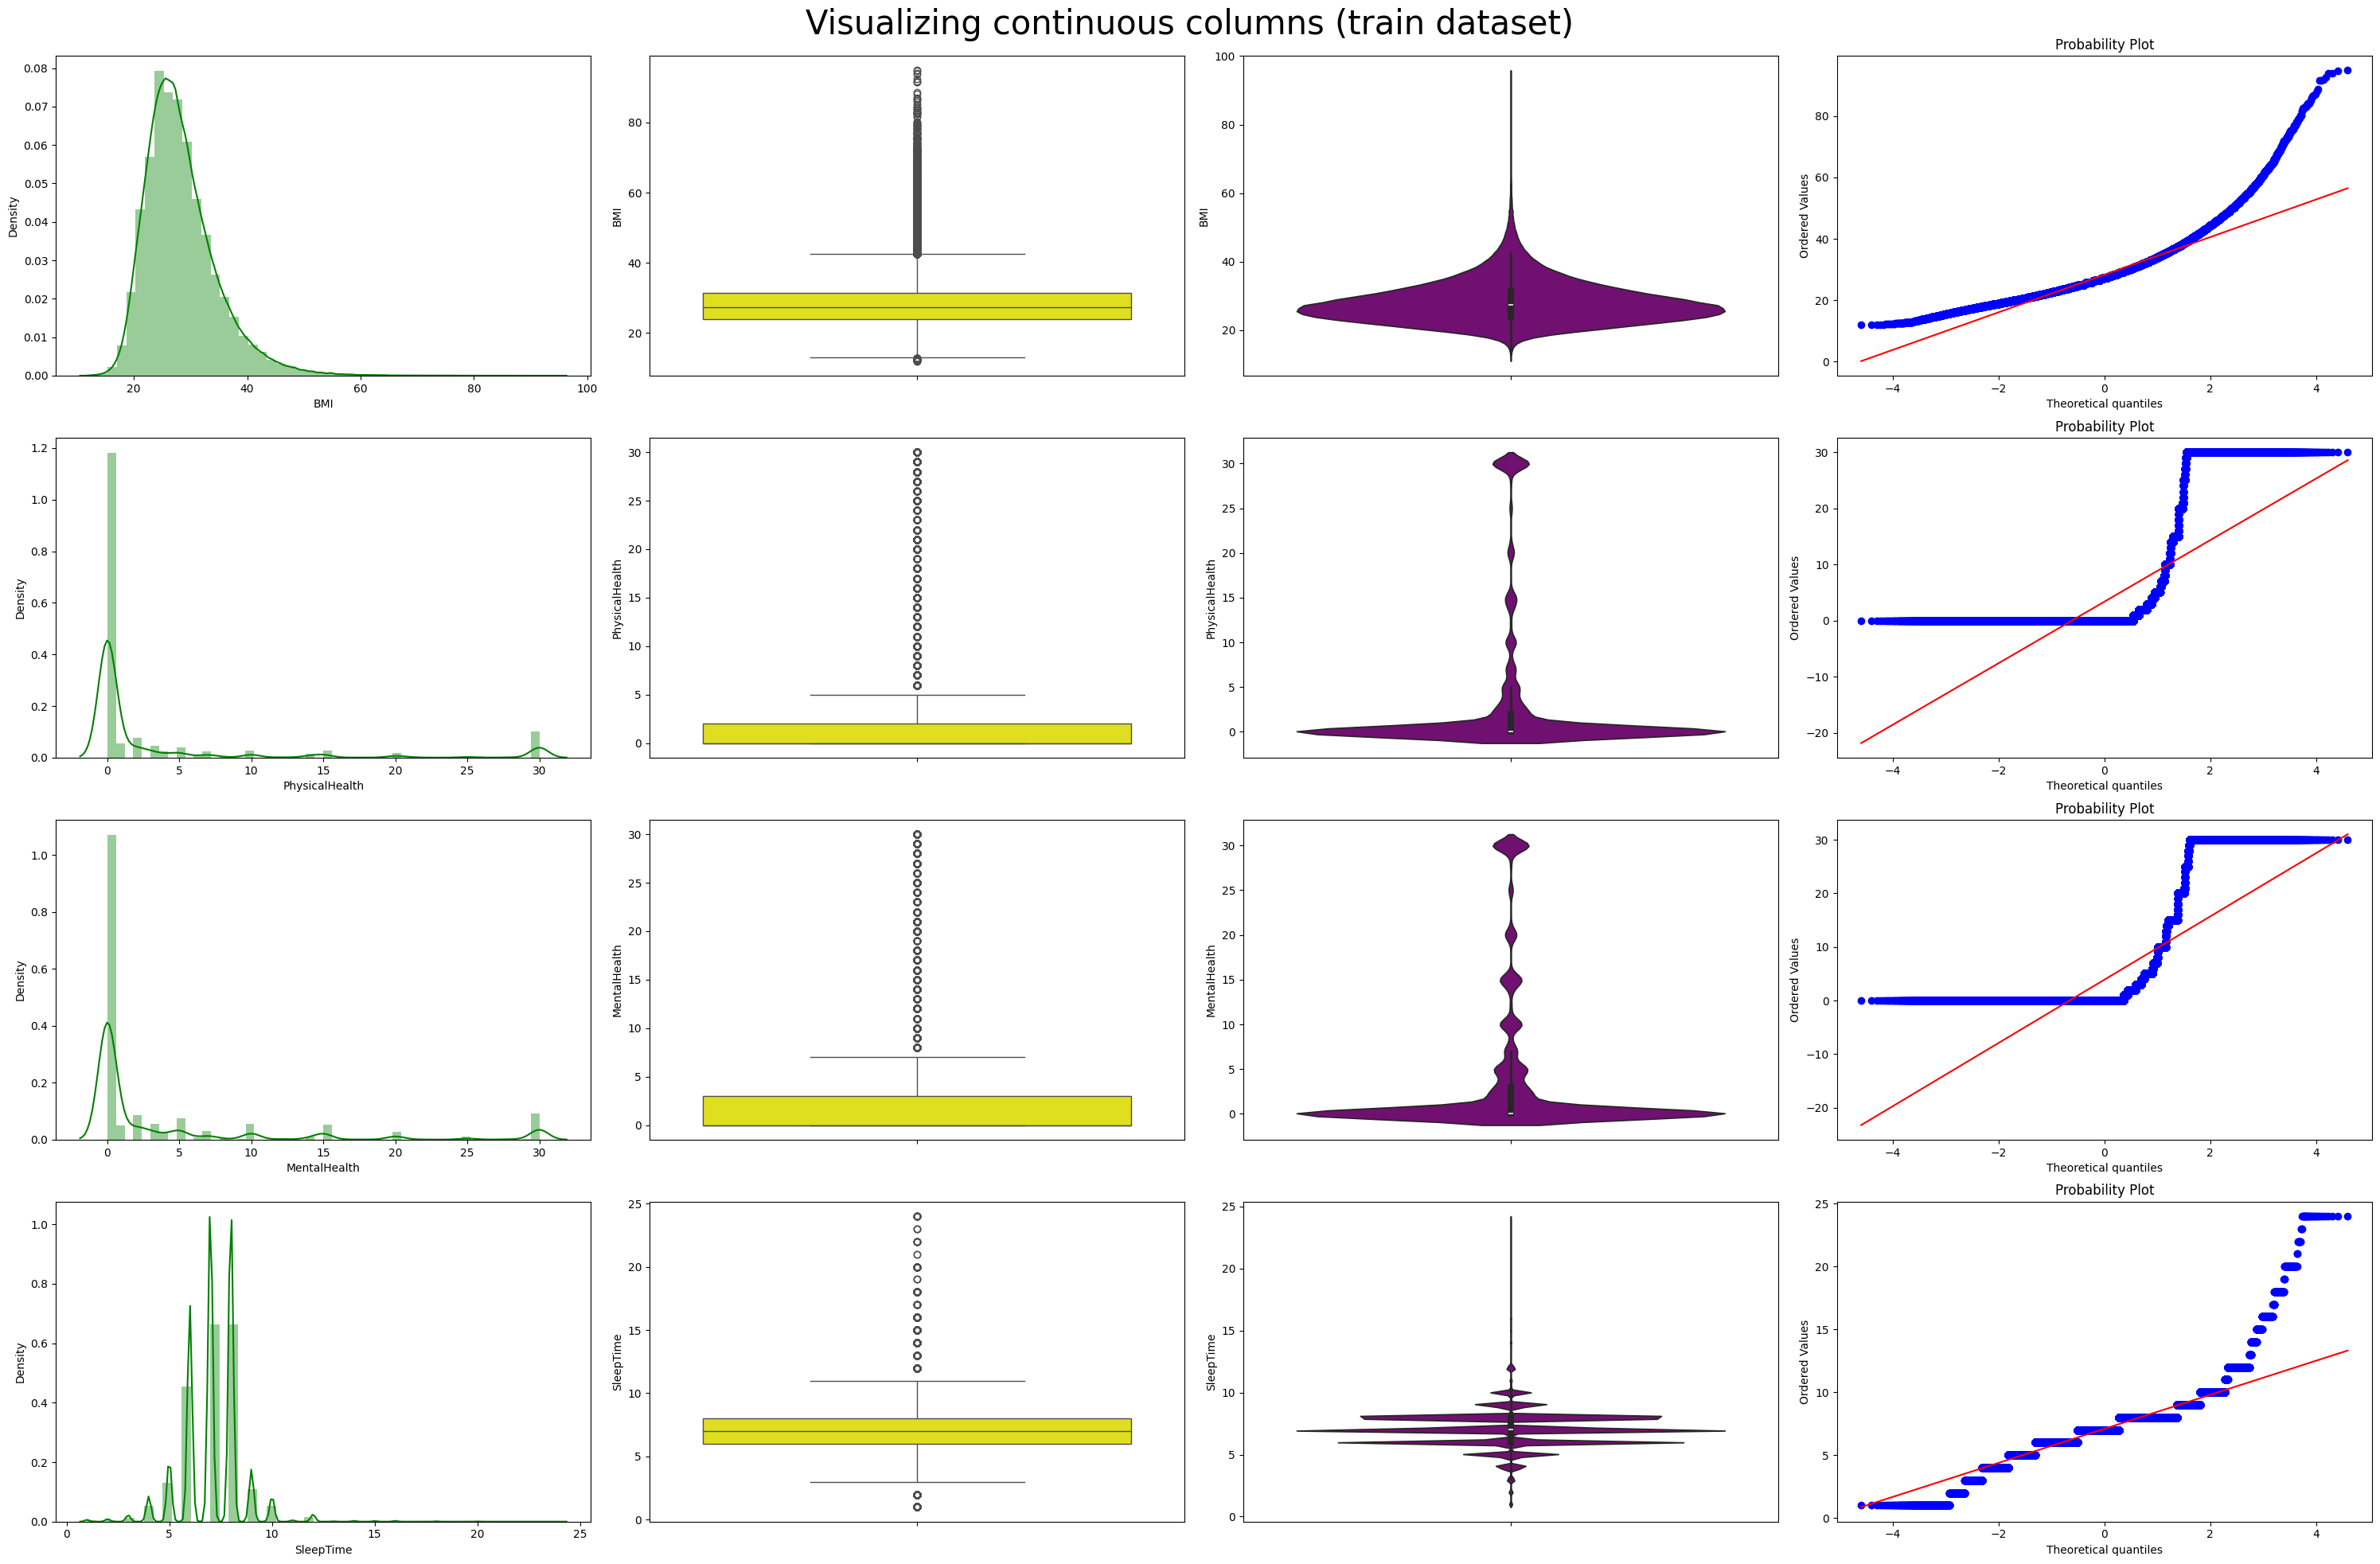

In [11]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    sns.violinplot(train[i],ax=ax[index,2],color='purple')
    stats.probplot(train[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

##  distribution of the number of people with heart disease from various factors

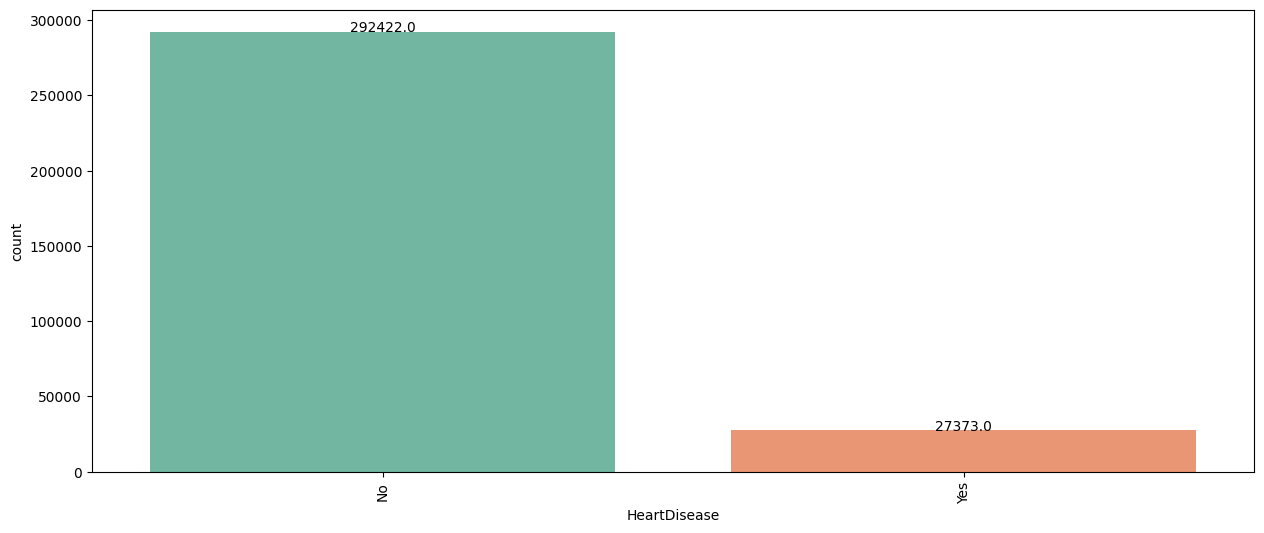

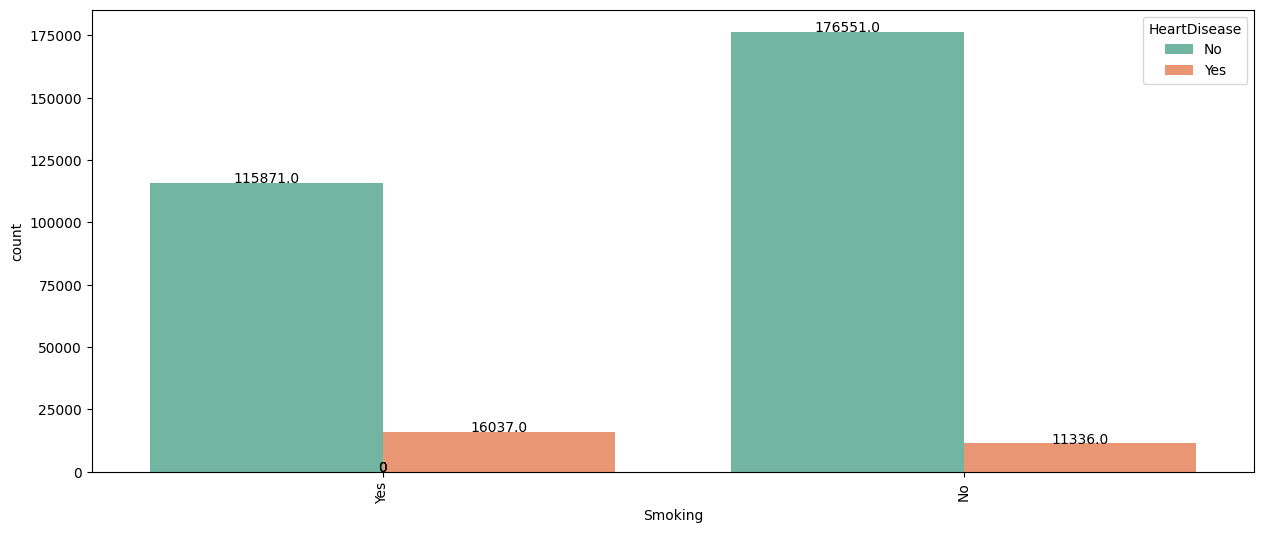

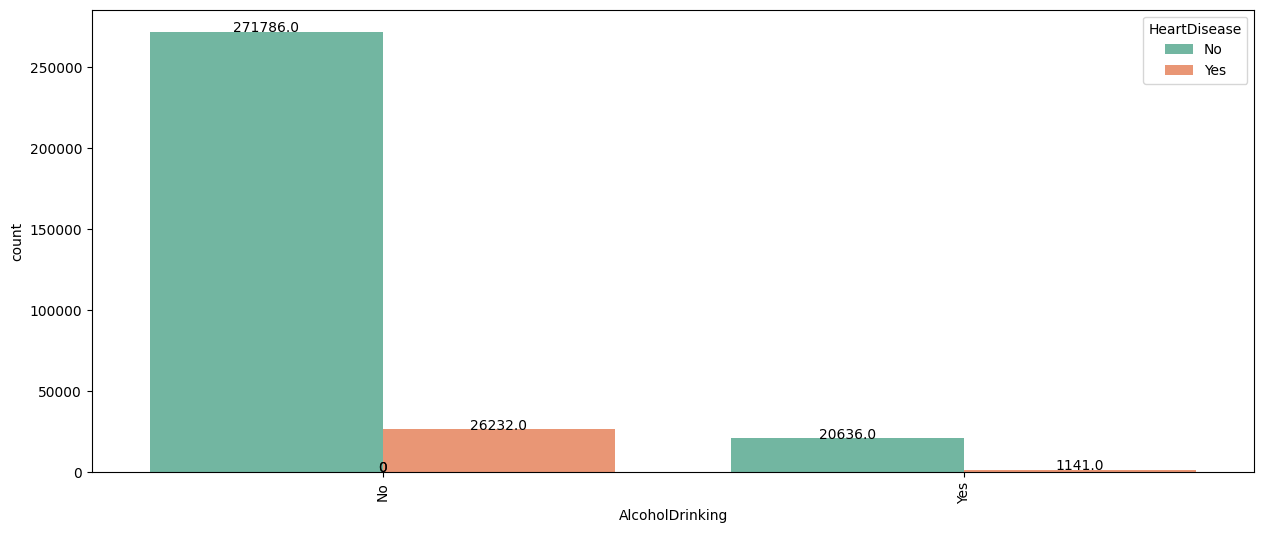

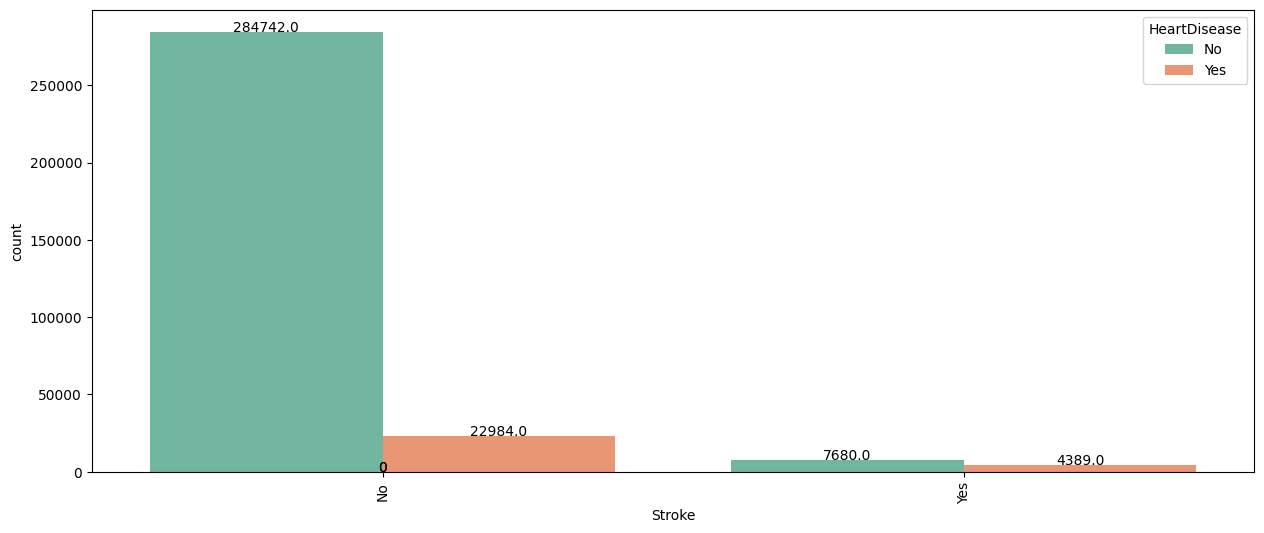

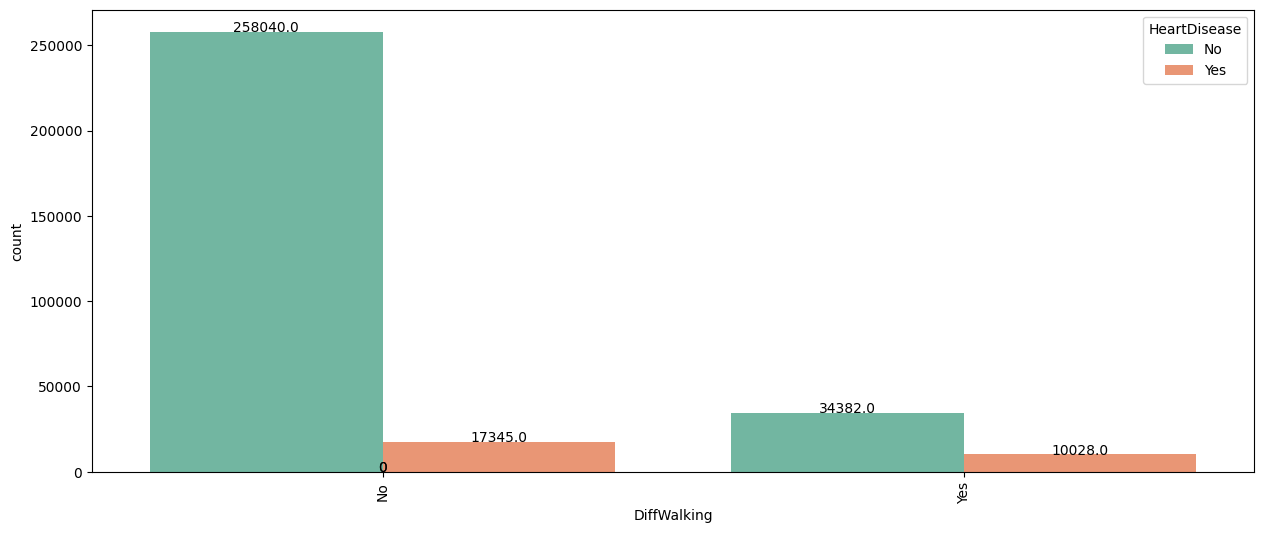

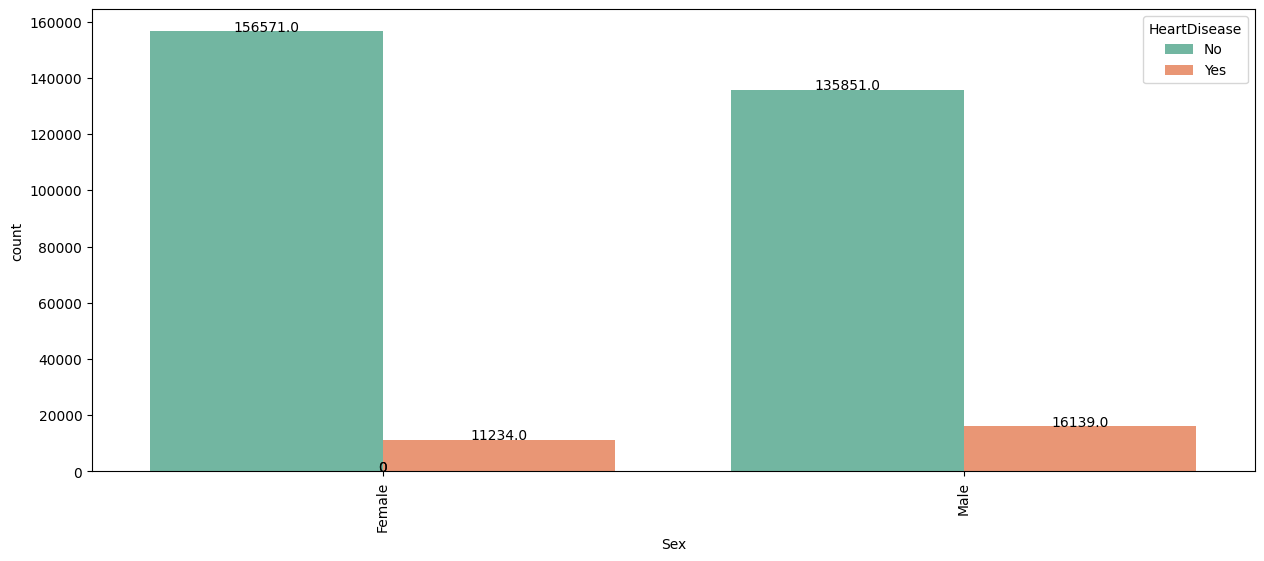

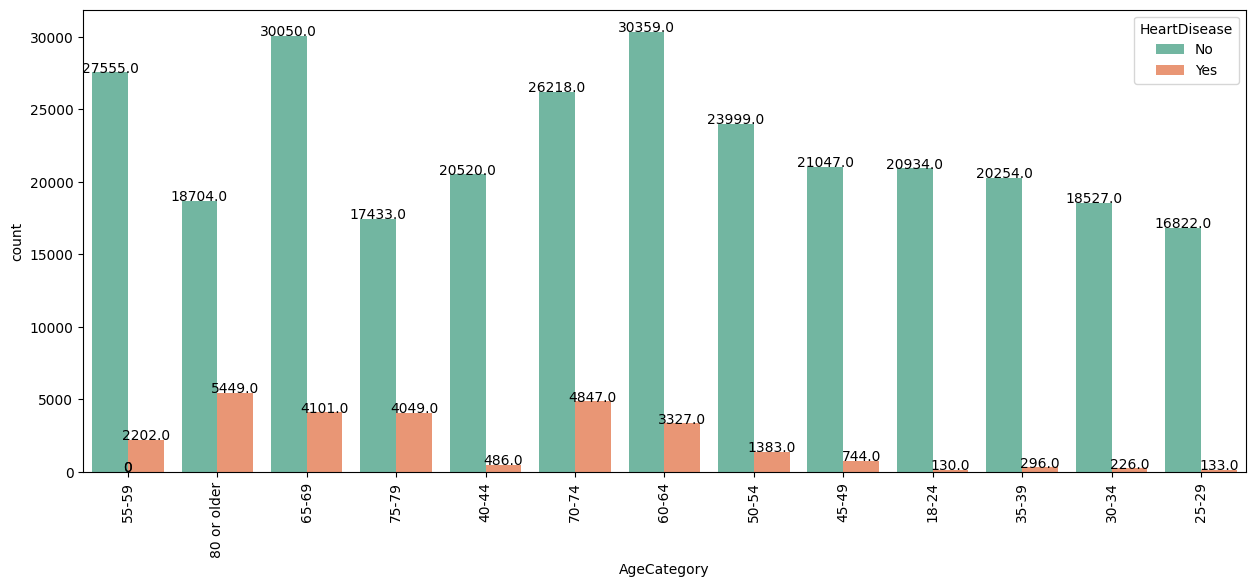

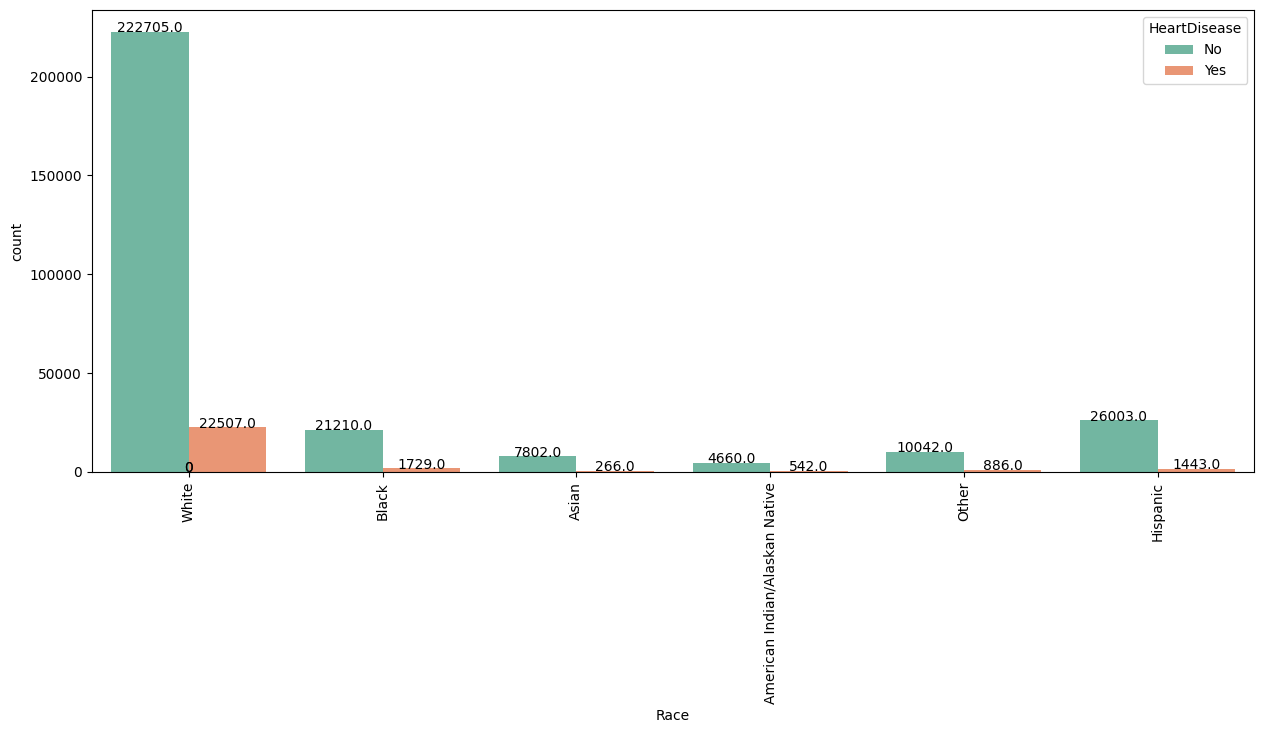

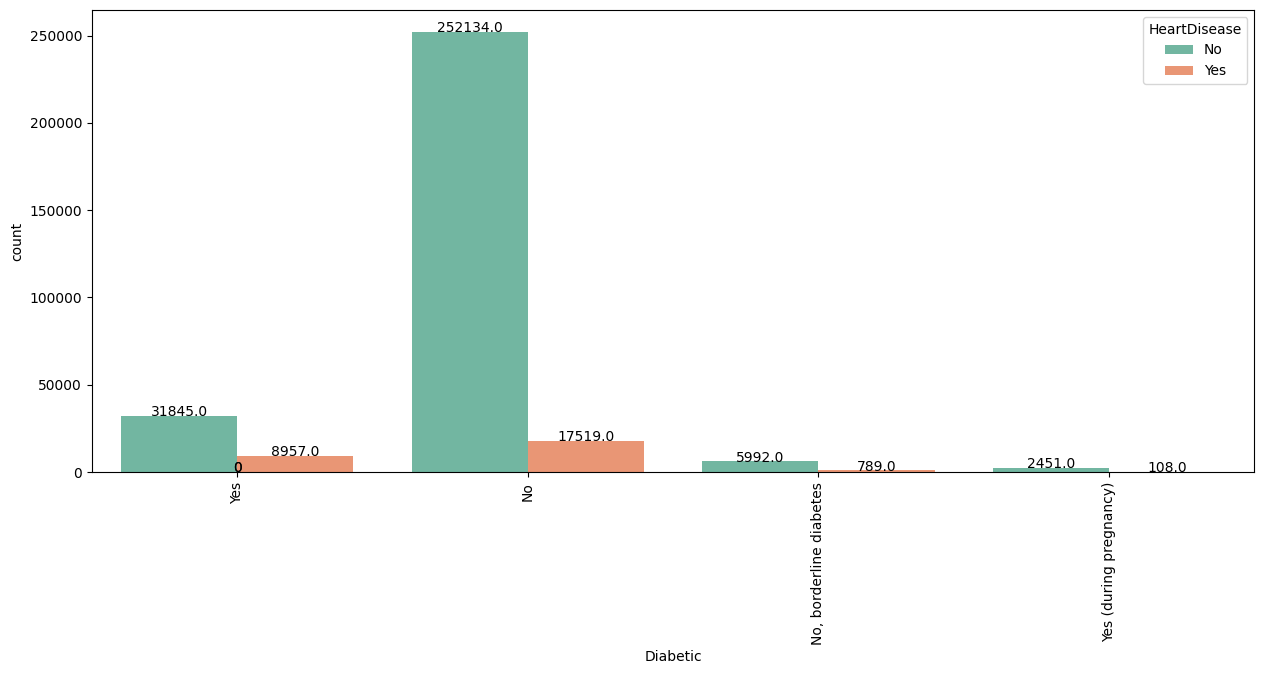

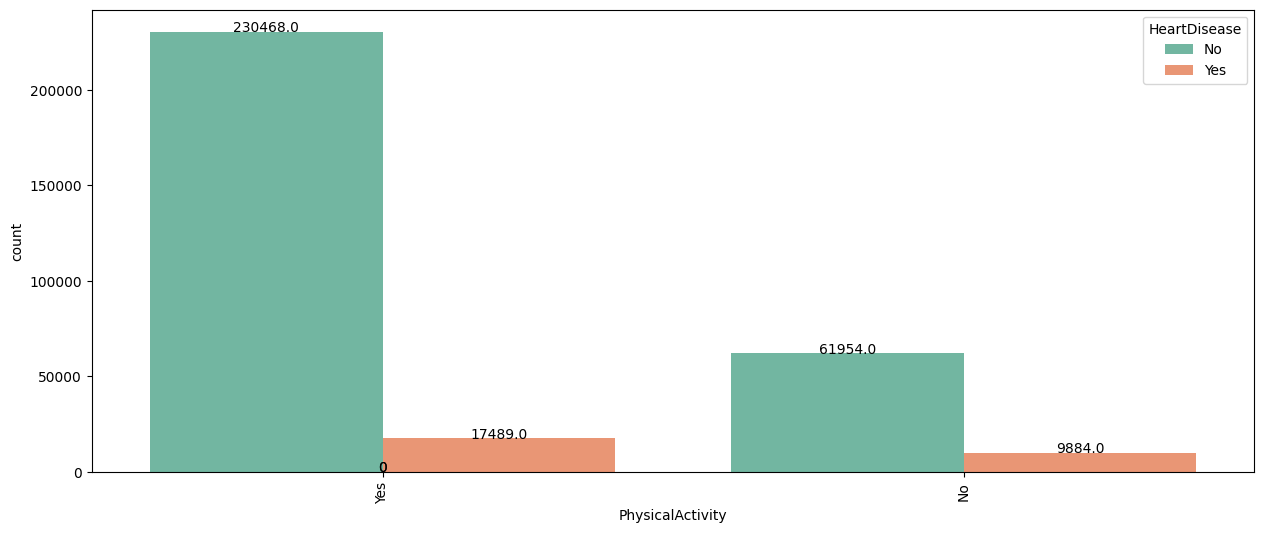

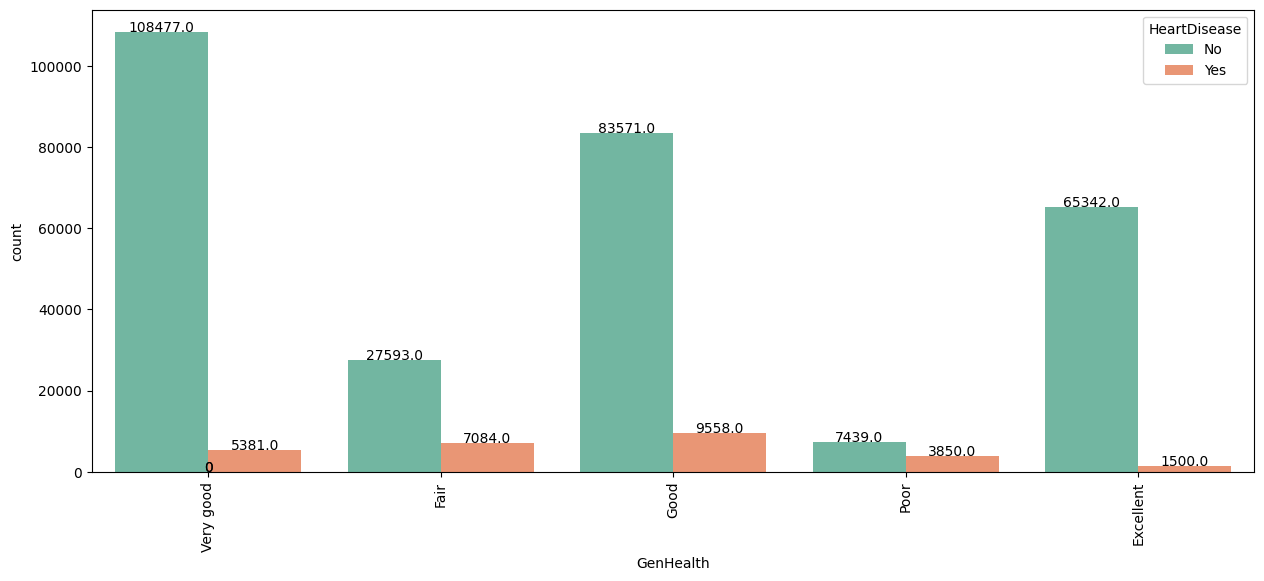

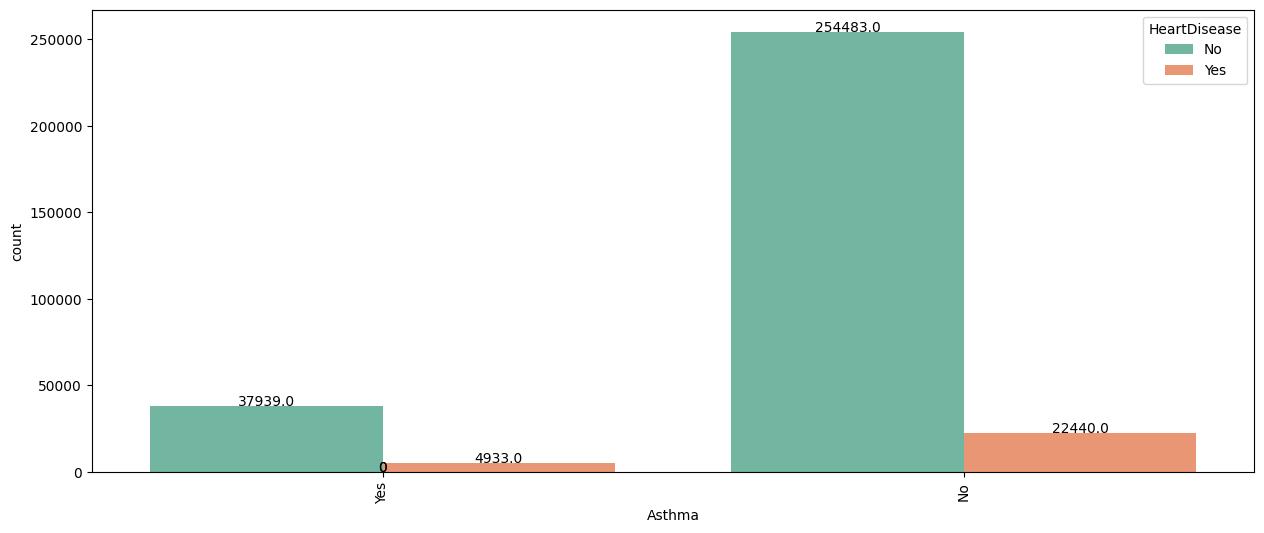

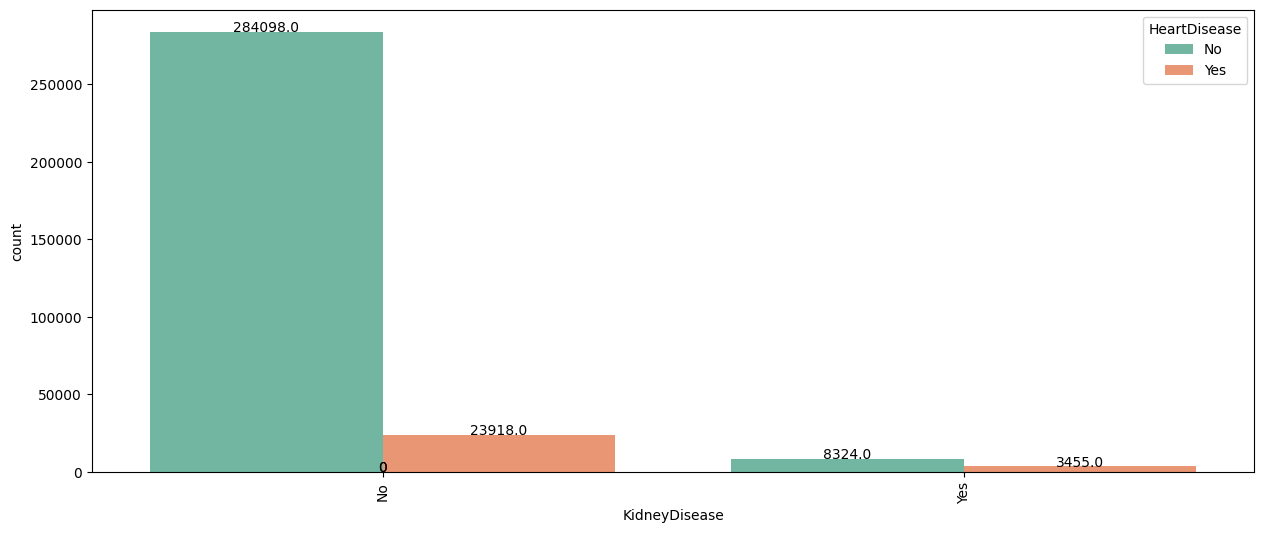

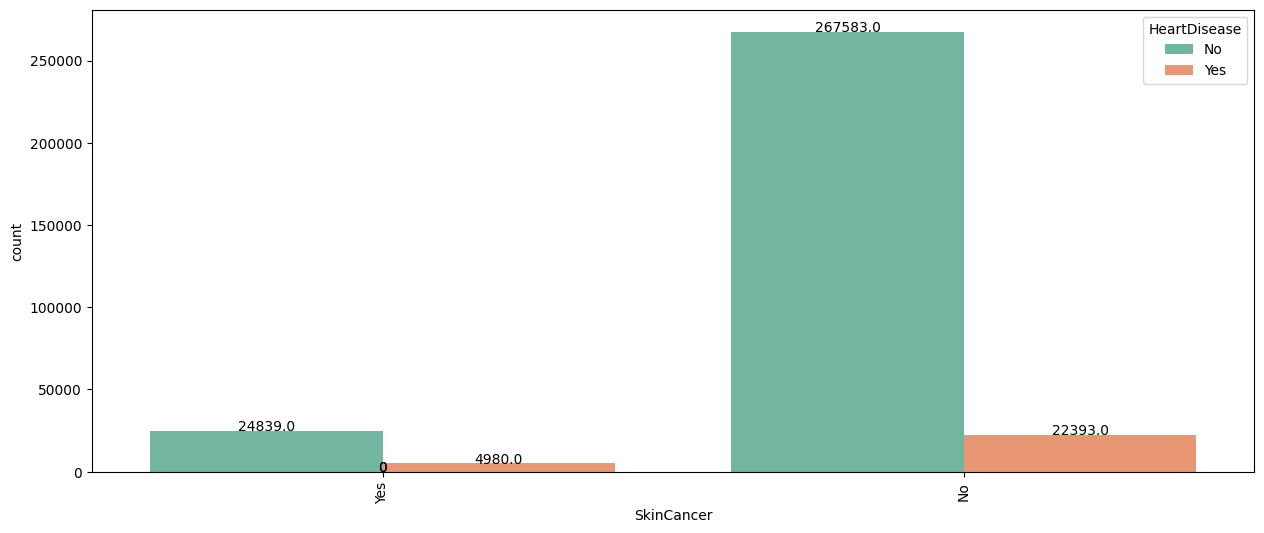

In [12]:
for feature in categorical_features:
    fig, ax1 = plt.subplots(figsize=(15,6))
    graph = sns.countplot(ax=ax1,x = feature , data = train,hue='HeartDisease',palette='Set2')
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## outliers in numerical variables depending on several factors

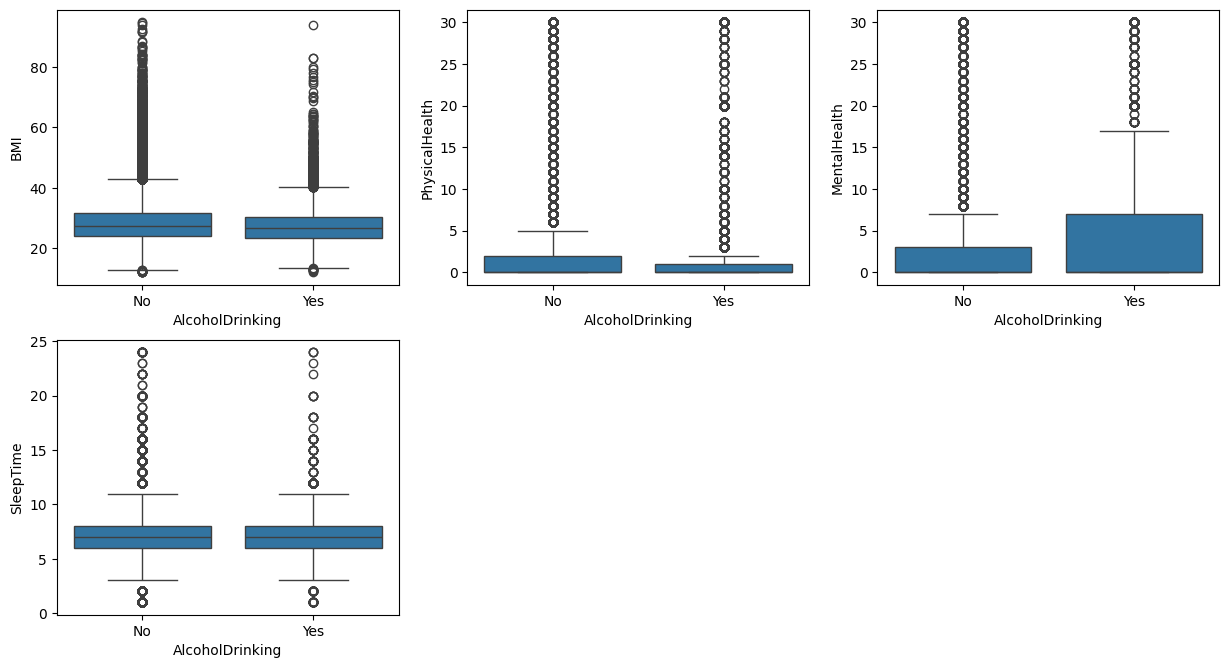

In [13]:
plt.figure(figsize=(15,25))
for i,feature in enumerate(numeric_features):
    plt.subplot(6,3,i+1)
    sns.boxplot(y=train[feature], x = train['AlcoholDrinking'])

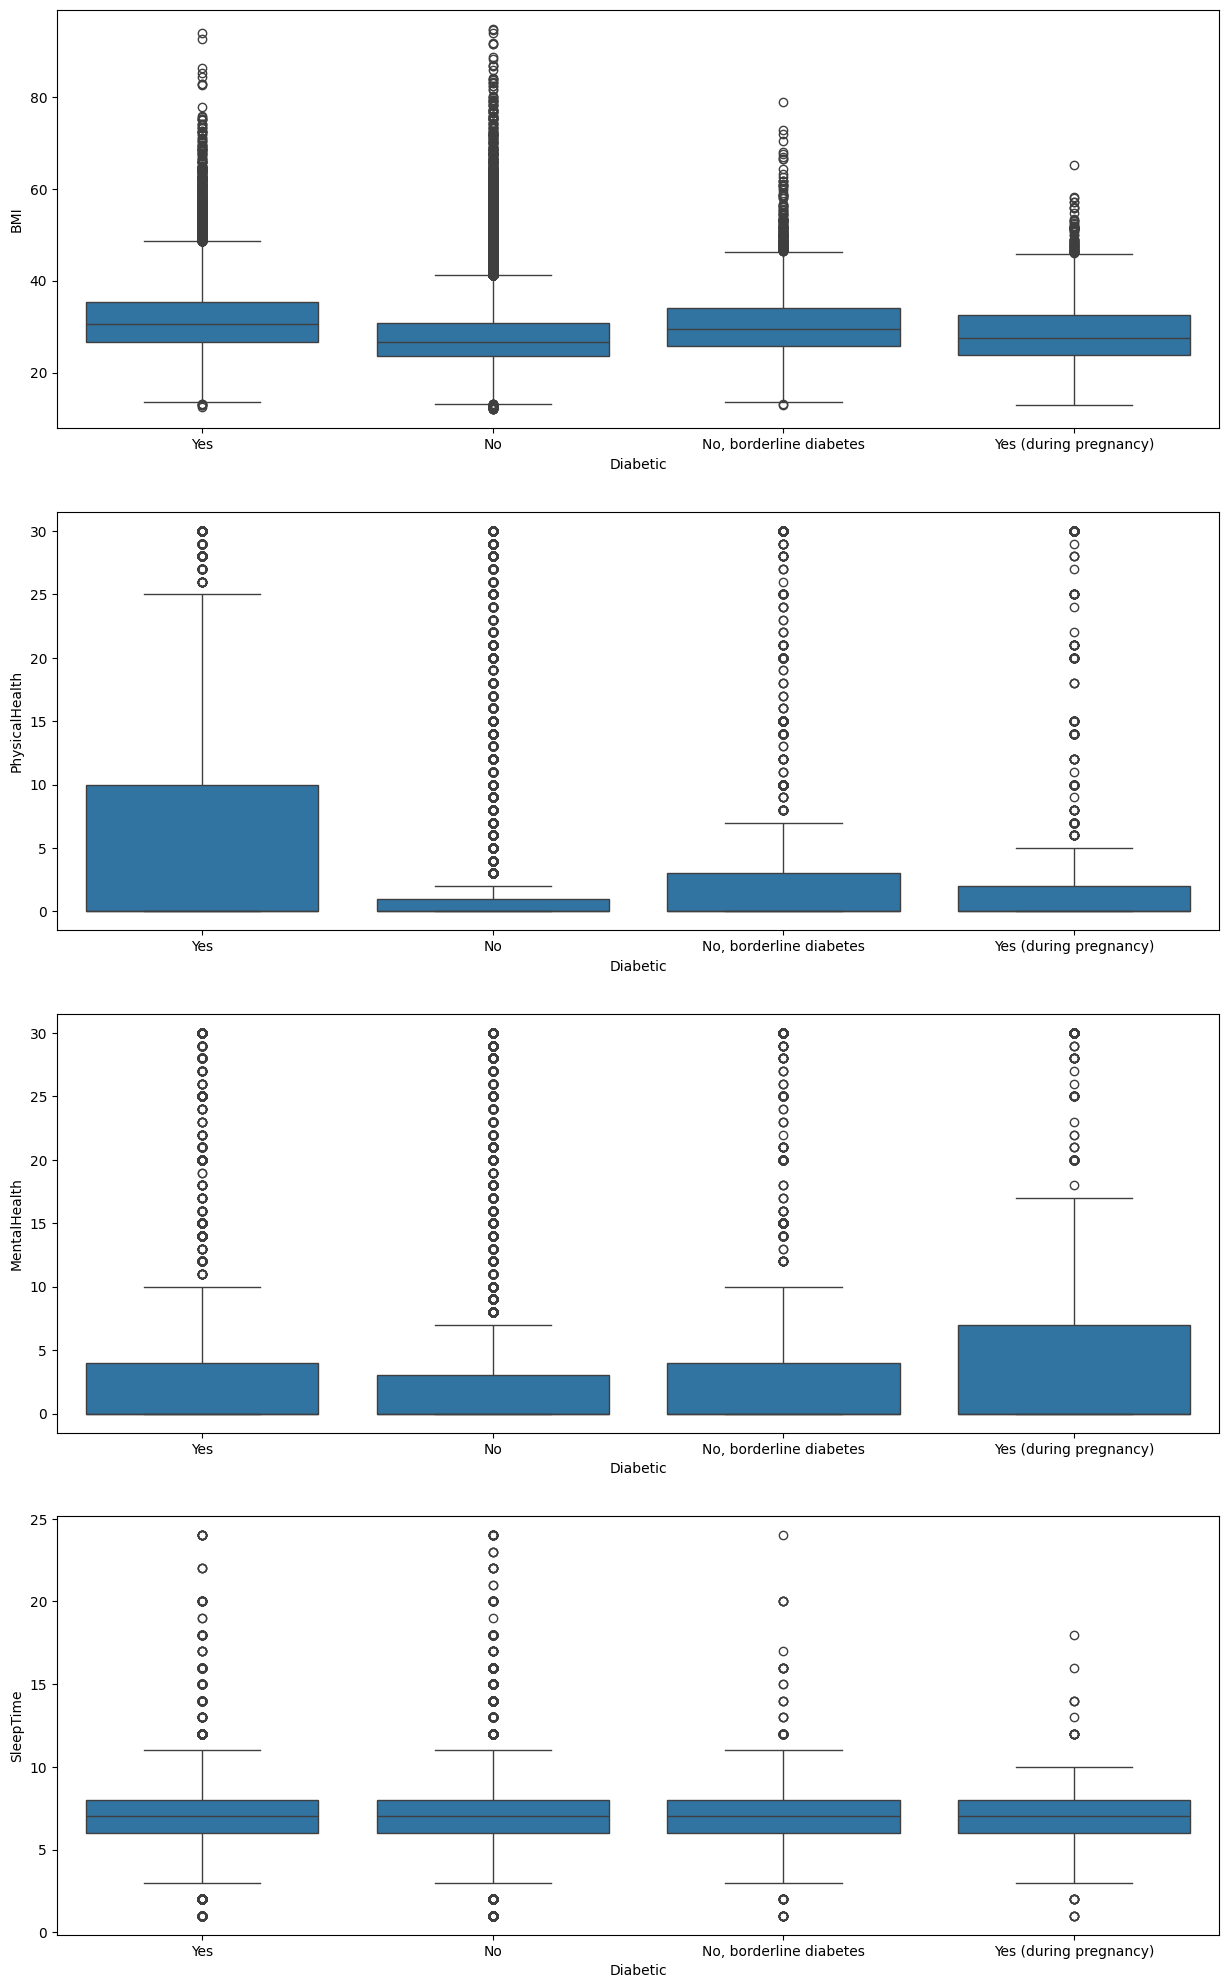

In [14]:
plt.figure(figsize=(15,25))
for i,feature in enumerate(numeric_features):
    plt.subplot(4,1,i+1)
    sns.boxplot(y=train[feature], x = train['Diabetic'])    

## carry out the Shapiro-Wilk test to check for the normality of the distribution of numerical variables.

In [15]:
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
    stat, p = shapiro(train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


## transform our dataset using the OrdinalEncoder method

Encode categorical features as an integer array.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[categorical_features])
train[categorical_features] = enc.transform(train[categorical_features])

##  build a correlation table

In [17]:
correlation = train.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



In [18]:
correlation

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<Axes: >

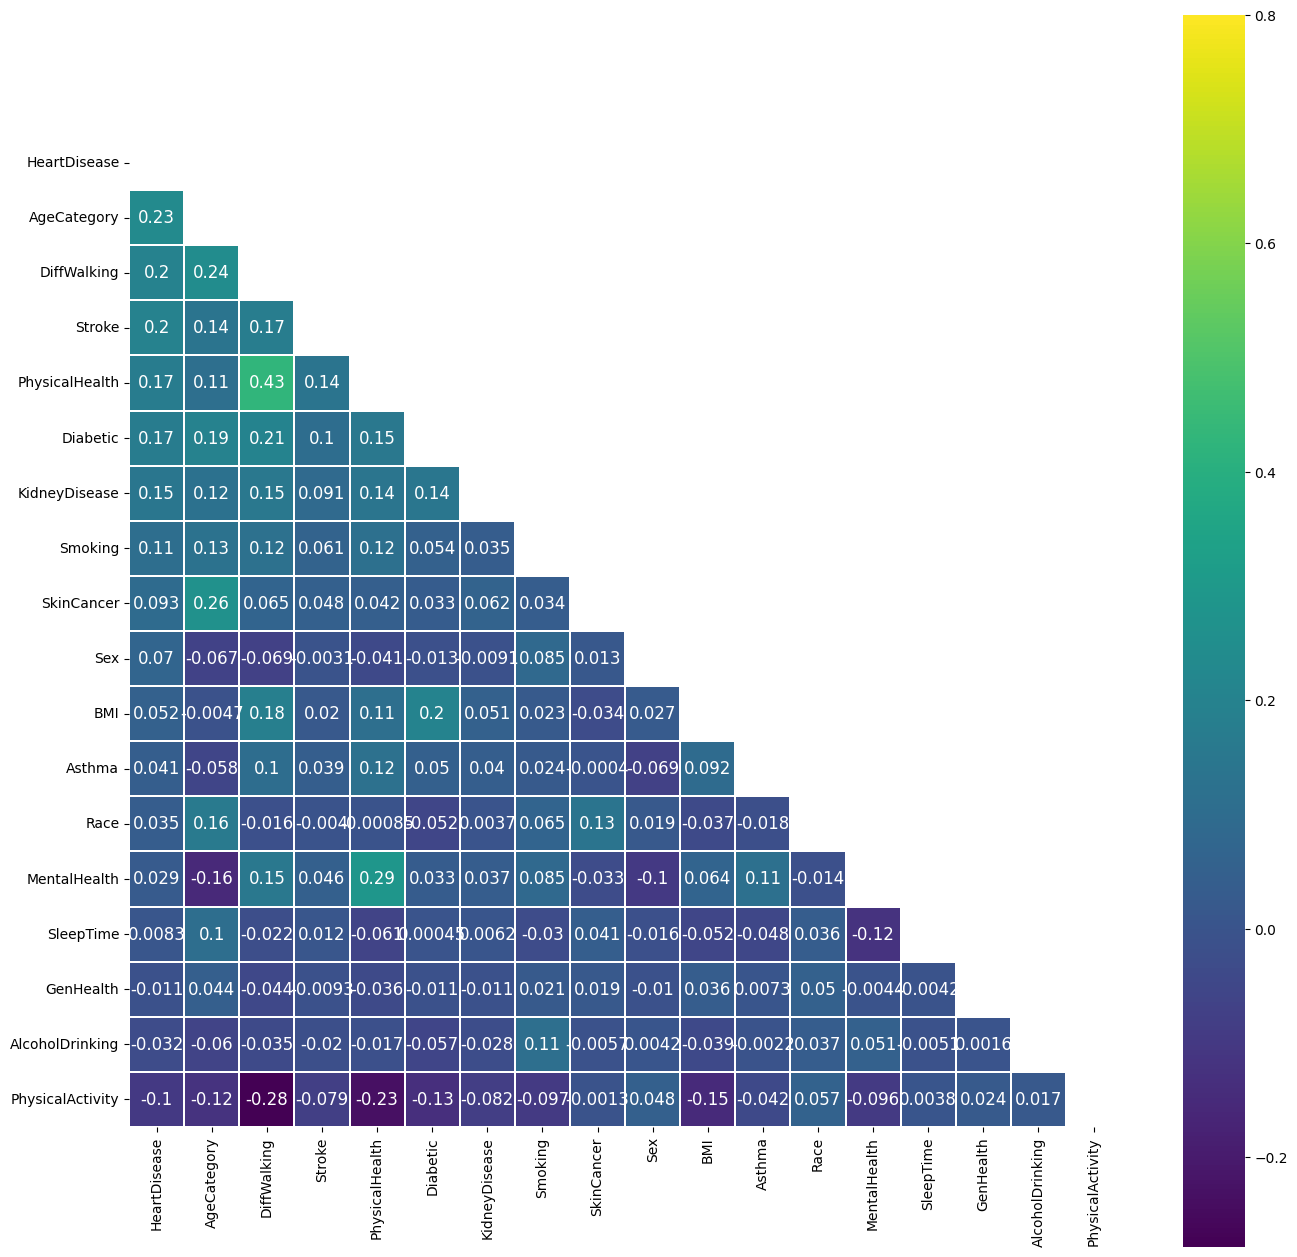

In [19]:
k = correlation.shape[1]
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (16,16))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

## Machine learning

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [21]:
y=train['HeartDisease']
train.drop('HeartDisease',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.2,random_state=42)

**`Precision`** measures the proportion of correctly predicted positive instances (True Positives) out of all instances that were predicted as positive (True Positives + False Positives). It tells us how "precise" or accurate the model's positive predictions are.
<BR>$ Precision = TP / (TP + FP)$
<BR>* Use when False Positives are more critical than false negatives (e.g., spam detection, fraud detection)

**`Recall`** measures the proportion of correctly predicted positive instances (True Positives) out of all actual positive instances (True Positives + False Negatives). It tells us how well the model can identify all the positive instances.
<BR>$ Recall = TP / (TP + FN) $
<BR>* Use when False Negatives are more critical than false positives (e.g., medical diagnosis, safety-critical systems)

**`F1 Score`** is the harmonic mean of Precision and Recall. It provides a single metric that balances the trade-off between Precision and Recall, especially when you need to account for both false positives and false negatives.
<BR>$ F1Score = 2 * (Precision * Recall) / (Precision + Recall) $
<BR>* Use when Both Precision and Recall are equally important, and you need a single performance metric.

**`Precision`**（精確率）
何時使用： 當 假陽性（False Positives） 的成本較高時應優先考慮精確率。
<BR>$ Precision = TP / (TP + FP)$
範例：
垃圾郵件檢測： 你不希望錯誤地將重要郵件標記為垃圾郵件。
詐欺檢測： 你不希望錯誤地標記正常交易為詐欺，因為這會導致客戶的不滿。

**`Recall`**（召回率）
何時使用： 當 假陰性（False Negatives） 的成本較高時應優先考慮召回率。
<BR>$ Recall = TP / (TP + FN) $
範例：
醫學診斷： 你不希望錯過檢測出患有疾病的患者（假陰性）。
安全系統： 你不希望錯過檢測任何潛在的威脅或入侵。

**`F1 Score`** 
何時使用： 當 Precision 和 Recall 同樣重要時，或者希望在這兩者之間取得平衡時，應使用 F1 Score。
<BR>$ F1Score = 2 * (Precision * Recall) / (Precision + Recall) $
範例：
不平衡數據集： 當某一類別的數據占比遠低於另一類別時（例如稀有事件的檢測），F1 Score 是一個更好的選擇，因為它能綜合考慮 Precision 和 Recall 的表現

model: KNeighborsClassifier()
Accuracy_score: 0.9050954517737926
Precission_score: 0.3273121387283237
** Recall_score: 0.08100858369098712
F1-score: 0.12987385321100917


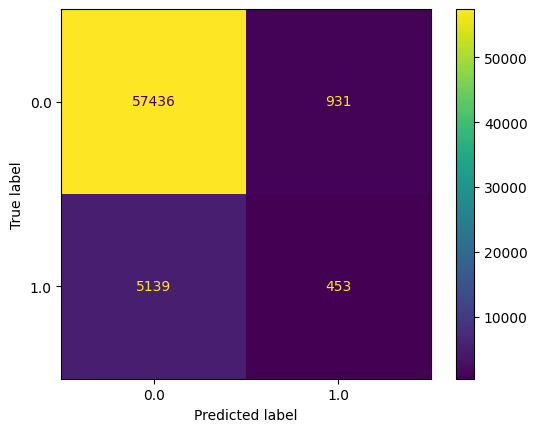

------------------------------------------------------------ 

model: RandomForestClassifier()
Accuracy_score: 0.9042667959161338
Precission_score: 0.3562533838657282
** Recall_score: 0.11766809728183118
F1-score: 0.1769054980508133


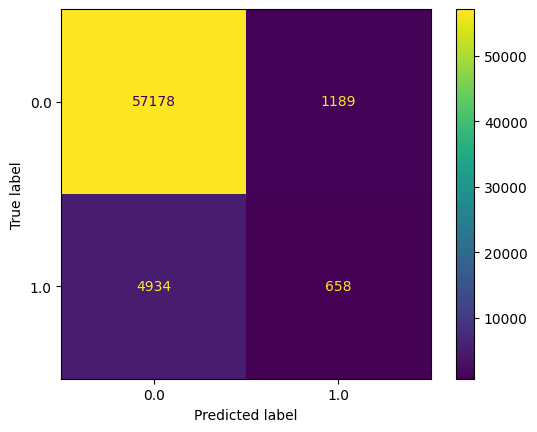

------------------------------------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9131318500914648
Precission_score: 0.5181086519114688
** Recall_score: 0.09209585121602289
F1-score: 0.15639234740358335


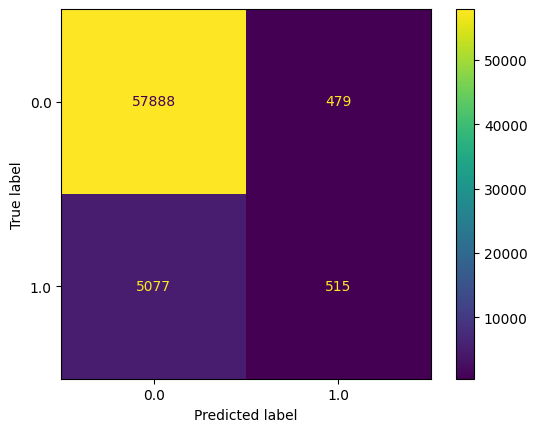

------------------------------------------------------------ 

model: LinearSVC()
Accuracy_score: 0.9134914554636564
Precission_score: 0.604982206405694
** Recall_score: 0.030400572246065807
F1-score: 0.05789204835688745


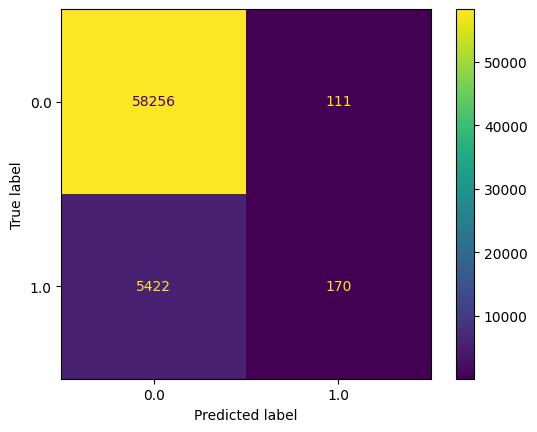

------------------------------------------------------------ 



In [22]:
models = [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), LinearSVC()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'** Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    cm = confusion_matrix(y_test, y_pred, labels = m.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = m.classes_)
    disp.plot()
    plt.show()
    print('-'*60, '\n')

## retrain LogisticRegression model with all data

In [23]:
RF = RandomForestClassifier(n_estimators=50,  # Number of trees in the forest
                            max_depth=5,      # Maximum depth of the trees
                            random_state=42  )
RF.fit(train, y)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

## Visualise Model

In [24]:
y_train.unique().astype(str)

array(['0.0', '1.0'], dtype='<U32')

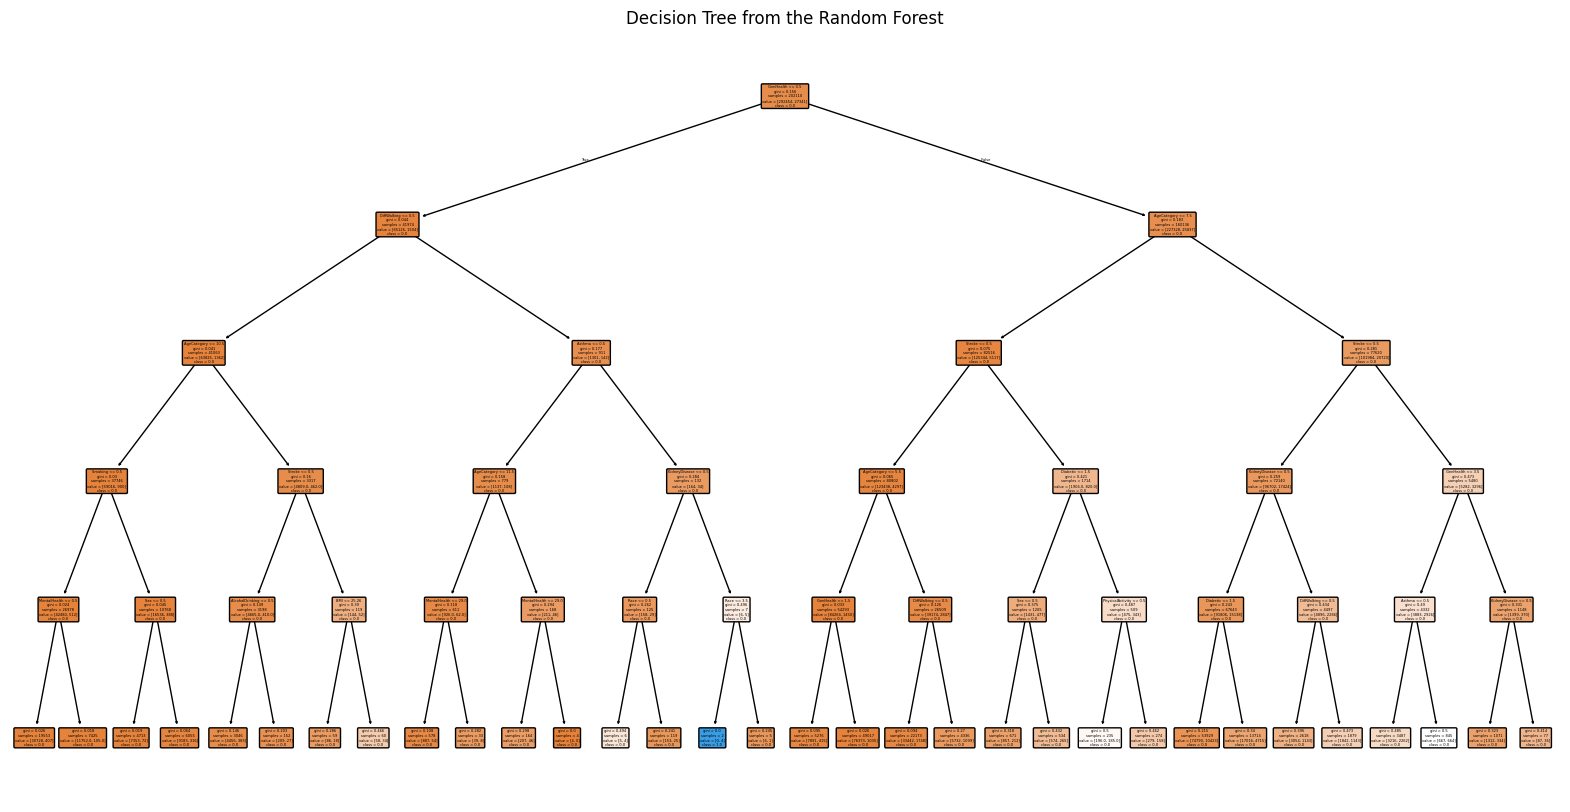

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the tree using the plot_tree function from sklearn
tree = RF.estimators_[0]

plt.figure(figsize=(20,10))  # Set figure size to make the tree more readable
plot_tree(tree, 
          feature_names=X_train.columns,  # Use the feature names from the dataset
          class_names=y_train.unique().astype(str),  # Use class names (species names)
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes
plt.title("Decision Tree from the Random Forest")
plt.show()

## Test with live sample

In [26]:
origin_data = pd.read_csv('heart_2020_cleaned.csv')

In [27]:
origin_data.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [28]:
train[numeric_features].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## High risk group

In [29]:
origin_data.loc[(origin_data.BMI>31)
                &(origin_data.PhysicalHealth>25)
               &(origin_data.MentalHealth>25)
               &(origin_data.SkinCancer=='Yes')
               &(origin_data.GenHealth=='Poor')]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
451,No,31.64,No,No,No,30.0,28.0,Yes,Female,65-69,White,No,No,Poor,4.0,Yes,Yes,Yes
1311,Yes,44.86,Yes,No,No,30.0,30.0,Yes,Male,70-74,American Indian/Alaskan Native,Yes,No,Poor,5.0,No,No,Yes
3317,Yes,37.28,No,No,No,30.0,30.0,Yes,Male,75-79,American Indian/Alaskan Native,Yes,No,Poor,5.0,Yes,Yes,Yes
5036,Yes,31.32,Yes,No,No,30.0,30.0,Yes,Female,60-64,White,Yes,No,Poor,8.0,Yes,No,Yes
15515,No,38.01,Yes,No,No,30.0,30.0,Yes,Male,80 or older,White,No,No,Poor,6.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303192,No,62.24,No,No,No,30.0,30.0,Yes,Female,55-59,White,Yes,No,Poor,6.0,Yes,No,Yes
303631,Yes,38.38,Yes,No,No,30.0,30.0,Yes,Male,70-74,White,No,No,Poor,2.0,No,Yes,Yes
304435,No,33.00,Yes,No,No,30.0,30.0,No,Male,65-69,White,No,Yes,Poor,8.0,No,No,Yes
304983,No,33.58,Yes,No,Yes,30.0,30.0,Yes,Male,40-44,White,No,No,Poor,5.0,Yes,No,Yes


In [30]:
def test_HeartDisease(test):
    if RF.predict(test)==0:
        print('You seem healthy and no Heart Disease.')
    else:
        print('According to Heart Disease model, \
you may be under concerned. Please consult your Dr.')

In [31]:
test_HeartDisease(train[train.index==5])

You seem healthy and no Heart Disease.


In [32]:
test_HeartDisease(train[train.index==35])

You seem healthy and no Heart Disease.


In [33]:
test_HeartDisease(train[train.index==404])

You seem healthy and no Heart Disease.


In [34]:
test_HeartDisease(train[train.index==3317])

You seem healthy and no Heart Disease.


In [35]:
test_HeartDisease(train[train.index==1311])

You seem healthy and no Heart Disease.


## Test on real data

In [36]:
for c in categorical_features:
    if c != 'HeartDisease': 
        print(c, sorted(origin_data[c].unique()))
        print(c, sorted(train[c].unique()))

Smoking ['No', 'Yes']
Smoking [0.0, 1.0]
AlcoholDrinking ['No', 'Yes']
AlcoholDrinking [0.0, 1.0]
Stroke ['No', 'Yes']
Stroke [0.0, 1.0]
DiffWalking ['No', 'Yes']
DiffWalking [0.0, 1.0]
Sex ['Female', 'Male']
Sex [0.0, 1.0]
AgeCategory ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
AgeCategory [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Race ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']
Race [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Diabetic ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
Diabetic [0.0, 1.0, 2.0, 3.0]
PhysicalActivity ['No', 'Yes']
PhysicalActivity [0.0, 1.0]
GenHealth ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']
GenHealth [0.0, 1.0, 2.0, 3.0, 4.0]
Asthma ['No', 'Yes']
Asthma [0.0, 1.0]
KidneyDisease ['No', 'Yes']
KidneyDisease [0.0, 1.0]
SkinCancer ['No', 'Yes']
SkinCancer [0.0, 1.0]


BMI = Body Mass Index (BMI) 

MentalHealth = Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

PhysicalHealth = Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

SleepTime = On average, how many hours of sleep do you get in a 24-hour period?

In [37]:
healthy_test = pd.DataFrame({'BMI': 23, 
                        'Smoking': 0, # Non smoker
                        'AlcoholDrinking': 0, # No
                        'Stroke':0 , # No 
                        'PhysicalHealth': 0, # 0 day injury
                        'MentalHealth': 0, # 0 day not good
                        'DiffWalking': 0, # No
                        'Sex': 1, # Male 
                        'AgeCategory':5, # 45-50 
                        'Race': 1, # Asian
                        'Diabetic': 0, # no
                        'PhysicalActivity': 1, # Yes, physical activity or exercise  
                        'GenHealth': 0, # Excellent
                        'SleepTime': 8,  # 8 hours
                        'Asthma': 0, # No
                        'KidneyDisease': 0, # No
                        'SkinCancer': 0},index=[1]) # No

In [38]:
test_HeartDisease(healthy_test)        

You seem healthy and no Heart Disease.
